In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [3]:
import pandas as pd
exchange = pd.read_csv('/content/exchange_final.csv')
m2 = pd.read_csv('/content/M2_2000_2024.CSV' , encoding='cp949')

In [5]:
exchange.head()

,Unnamed: 0,TIME,원/달러환율,한국 장기 시장 금리,미국 장기 시장 금리,중국 장기 시장 금리,한국 단기 시장 금리,미국 단기 시장 금리,중국 단기 시장 금리,전체 수출 총액,...,한국 중앙정부 부채 비율,미국 중앙정부 부채 비율,한국 10년 채권수익률,미국 10년 채권수익률,한국 인플레이션율,미국 인플레이션율,인플레이션 격차,실질GDP,실질GDP성장률,vix
0,0,2000-01-01,1130.32,NaN,6.66,NaN,7.28,5.95,2.72,12162425,...,NaN,33.267642,NaN,NaN,NaN,NaN,NaN,883159.302102,NaN,24.95
1,1,2000-02-01,1129.29,NaN,6.52,NaN,7.13,6.01,2.73,12676042,...,NaN,34.865592,NaN,NaN,NaN,NaN,NaN,876860.243167,NaN,23.37
2,2,2000-03-01,1115.75,NaN,6.26,NaN,7.00,6.14,2.64,14429703,...,NaN,36.463543,NaN,NaN,NaN,NaN,NaN,870598.143103,NaN,24.11
3,3,2000-04-01,1110.01,NaN,5.99,NaN,7.06,6.28,2.64,13522040,...,NaN,38.061493,NaN,NaN,NaN,NaN,NaN,864372.677584,NaN,26.20
4,4,2000-05-01,1121.37,NaN,6.44,NaN,7.14,6.71,2.57,14636755,...,NaN,39.659444,NaN,NaN,NaN,NaN,NaN,858183.526068,NaN,23.65


In [4]:
m2.head()

,TIME,M2,증가율
0,2000-01,674.7231,-0.8
1,2000-02,677.6103,0.4
2,2000-03,685.3970,1.1
3,2000-04,689.5531,0.6
4,2000-05,688.6894,-0.1


In [6]:
# 1. 날짜 포맷 맞추기
exchange['TIME'] = pd.to_datetime(exchange['TIME']).dt.strftime('%Y-%m')

# 2. m2 인코딩해서 불러오기
m2 = pd.read_csv('/content/M2_2000_2024.CSV', encoding='cp949')  # 또는 euc-kr

# 3. 조인 (왼쪽 기준: exchange 기준으로 붙이기)
merged = pd.merge(exchange, m2, on='TIME', how='left')

In [7]:
merged.head()

,Unnamed: 0,TIME,원/달러환율,한국 장기 시장 금리,미국 장기 시장 금리,중국 장기 시장 금리,한국 단기 시장 금리,미국 단기 시장 금리,중국 단기 시장 금리,전체 수출 총액,...,한국 10년 채권수익률,미국 10년 채권수익률,한국 인플레이션율,미국 인플레이션율,인플레이션 격차,실질GDP,실질GDP성장률,vix,M2,증가율
0,0,2000-01,1130.32,NaN,6.66,NaN,7.28,5.95,2.72,12162425,...,NaN,NaN,NaN,NaN,NaN,883159.302102,NaN,24.95,674.7231,-0.8
1,1,2000-02,1129.29,NaN,6.52,NaN,7.13,6.01,2.73,12676042,...,NaN,NaN,NaN,NaN,NaN,876860.243167,NaN,23.37,677.6103,0.4
2,2,2000-03,1115.75,NaN,6.26,NaN,7.00,6.14,2.64,14429703,...,NaN,NaN,NaN,NaN,NaN,870598.143103,NaN,24.11,685.3970,1.1
3,3,2000-04,1110.01,NaN,5.99,NaN,7.06,6.28,2.64,13522040,...,NaN,NaN,NaN,NaN,NaN,864372.677584,NaN,26.20,689.5531,0.6
4,4,2000-05,1121.37,NaN,6.44,NaN,7.14,6.71,2.57,14636755,...,NaN,NaN,NaN,NaN,NaN,858183.526068,NaN,23.65,688.6894,-0.1


In [12]:
merged.columns

Index(['Unnamed: 0', 'TIME', '원/달러환율', '한국 장기 시장 금리', '미국 장기 시장 금리',
       '중국 장기 시장 금리', '한국 단기 시장 금리', '미국 단기 시장 금리', '중국 단기 시장 금리', '전체 수출 총액',
       '미국 수출 총액', '중국 수출 총액', '전체 수입 총액', '미국 수입 총액', '중국 수입 총액',
       '소득 교역 조건 지수', '해외 직접 투자 금액', '경제 심리 지수', '한국 기준 금리', '미국 기준 금리',
       '중국 기준 금리', '한국 소비자 물가지수', '미국 소비자 물가지수', '중국 소비자 물가지수', '한국 외환 보유액',
       '미국 외환 보유액', '중국 외환 보유액', '한국 산업 생산 지수', '미국 산업 생산 지수', '한국 실업률',
       '미국 실업률', '한국 주가지수', '미국 주가지수', '중국 주가지수', 'WTI 유가', '두바이 유가',
       'Brent 유가', '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격', '알루미늄 가격', '니켈 가격',
       '아연 가격', '금 가격', '대두 가격', '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격',
       '외국인 투자 금액', '한국 경상수지', '미국 경상수지', '중국 경상수지', '한국 상품수지', '미국 상품수지',
       '중국 상품수지', '한국 경제성장률', '미국 경제성장률', '중국 경제성장률', '한국 GDP', '미국 GDP',
       '중국 GDP', '한국 GDP 디플레이터', '한국 중앙정부 부채 비율', '미국 중앙정부 부채 비율',
       '한국 10년 채권수익률', '미국 10년 채권수익률', '한국 인플레이션율', '미국 인플레이션율', '인플레이션 격차',
       '실질GDP', '실질GDP성장률', 'vix', 'M2', '증가율'],
 

In [31]:
import random
import numpy as np
import tensorflow as tf
import os

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

# 유효 가설의 변수로 모델 돌리기

In [19]:
import numpy as np

In [46]:
# 선희
features = ['경제 심리 지수', '한국 외환 보유액', 'vix', '한국 경상수지', 'WTI 유가', '두바이 유가',
                        'Brent 유가', '천연가스 가격', '유연탄 가격', '미국 주가지수', '한국 인플레이션율',
                       '인플레이션 격차', '실질GDP', '실질GDP성장률','M2', '금 가격', '아연 가격', '알루미늄 가격', '니켈 가격', '한국 실업률']

target = ['원/달러환율']

In [129]:
# 성능이 제일 좋음
features = ['경제 심리 지수', 'vix', '한국 상품수지', '한국 경상수지', 'WTI 유가', '두바이 유가',
                        'Brent 유가', '천연가스 가격', '유연탄 가격', '미국 주가지수',
                       '인플레이션 격차', '실질GDP', '실질GDP성장률', 'M2', '한국 외환 보유액', '외국인 투자 금액']


# ✅ GRU 예측 결과:
# 1. target = ['원/달러 환율']
#    RMSE: 47.53495559876181
#    MAE : 37.2572215687145
#    R²   : 0.7053291506274353

# 2. target = df['원/달러환율_t+1']
#    RMSE: 48.76163892495103
#    MAE : 38.07301447088069
#    R²   : 0.6972083470707606

In [107]:
# 유의미한 변수
features = ['경제 심리 지수', '한국 외환 보유액', 'vix', 'WTI 유가', '한국 실업률', '두바이 유가',
                        'Brent 유가', '천연가스 가격', '유연탄 가격', '미국 주가지수',
                        '한국 인플레이션율', '인플레이션 격차', '실질GDP성장률','M2',
                        '금 가격', '구리 가격', '아연 가격', '알루미늄 가격', '니켈 가격',
                        '외국인 투자 금액']

# ✅ GRU 예측 결과:
# 1. target = ['원/달러 환율']
#    RMSE: 100.70110204446566
#    MAE : 81.76913945737094
#    R²   : -0.27492617863643787

# 2. target = df['원/달러환율_t+1'] -> "과적합"
#    RMSE: 106.30031172767401
#    MAE : 88.020336383322
#    R²   : -0.48555715825150925

In [117]:
# 가설을 세운 모든 변수 (30개)
features = ['경제 심리 지수', '한국 기준 금리', '미국 기준 금리', '한국 외환 보유액',
            '한국 실업률', '미국 실업률', '한국 주가지수', '미국 주가지수', 'WTI 유가', '두바이 유가',
            'Brent 유가', '천연가스 가격', '유연탄 가격', '철광석 가격', '구리 가격',
            '알루미늄 가격', '니켈 가격', '아연 가격', '금 가격', '대두 가격', '외국인 투자 금액',
            '옥수수 가격', '소맥 가격', '원당 가격', '원면 가격',
            '한국 경상수지', '한국 인플레이션율', '인플레이션 격차',
            '실질GDP', '실질GDP성장률', 'vix']

# ✅ GRU 예측 결과:
# 1. target = ['원/달러 환율']
# RMSE: 91.50525480756137
# MAE : 81.15190596147016
# R²   : -0.09195077073793989

# 2. target = df['원/달러환율_t+1']
#    RMSE: 91.5375904823598
#    MAE : 80.07791836825282
#    R²   : -0.0670536683167835

In [124]:
target = ['원/달러환율']

In [130]:
# shift
# 미래 타깃 생성
merged['원/달러환율_t+1'] = merged['원/달러환율'].shift(-1)
target = ['원/달러환율_t+1']

## GRU

In [131]:
# 1. 결측치 제거
X = merged[features]
y = merged[target]
Xy = pd.concat([X, y], axis=1).dropna()
X = Xy[features].values
y = Xy[target].values

# 2. 시퀀스 생성 (look_back = 12)
def create_sequences(X, y, look_back=12):
    X_seq, y_seq = [], []
    for i in range(len(X) - look_back):
        X_seq.append(X[i:i+look_back])
        y_seq.append(y[i+look_back])
    return np.array(X_seq), np.array(y_seq)

look_back = 12
X_seq, y_seq = create_sequences(X, y, look_back)

# 3. 학습/검증 분할 (시계열 순서 유지)
train_size = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:train_size], X_seq[train_size:]
y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# 4. 스케일링: train에 fit → test에 transform
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# reshape: 3D → 2D → 3D
X_train_2d = X_train.reshape(-1, X_train.shape[2])
X_test_2d = X_test.reshape(-1, X_test.shape[2])

X_train_scaled = scaler_x.fit_transform(X_train_2d).reshape(X_train.shape)
X_test_scaled = scaler_x.transform(X_test_2d).reshape(X_test.shape)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

set_seed(42)

model = Sequential([
    GRU(16, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.1791 - val_loss: 0.0159
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1247 - val_loss: 0.0175
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0968 - val_loss: 0.0177
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0927 - val_loss: 0.0245
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0545 - val_loss: 0.0102
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0711 - val_loss: 0.0085
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0561 - val_loss: 0.0241
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0593 - val_loss: 0.0082
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0543 - val_loss: 0.0105
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0410 - val_loss: 0.0112
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0455 - val_loss: 0.0094
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

In [133]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측
y_pred_scaled = model.predict(X_test_scaled)
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled)
y_test_inv = scaler_y.inverse_transform(y_test_scaled)

# 직접 RMSE 계산
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

# 출력
print("✅ GRU 예측 결과:")
print("RMSE:", rmse)
print("MAE :", mae)
print("R²   :", r2)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
✅ GRU 예측 결과:
RMSE: 48.76163892495103
MAE : 38.07301447088069
R²   : 0.6972083470707606


In [134]:
# Train 예측 및 역변환
y_train_pred_scaled = model.predict(X_train_scaled)
y_train_pred_inv = scaler_y.inverse_transform(y_train_pred_scaled)
y_train_inv = scaler_y.inverse_transform(y_train_scaled)

# Train 성능지표
train_rmse = np.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))
train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
train_r2 = r2_score(y_train_inv, y_train_pred_inv)

# Test 성능지표 (이미 계산한 부분 포함)
test_rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
test_mae = mean_absolute_error(y_test_inv, y_pred_inv)
test_r2 = r2_score(y_test_inv, y_pred_inv)

# 출력 비교
print("✅ GRU 성능 비교")
print("▶ Train RMSE:", train_rmse)
print("▶ Test  RMSE:", test_rmse)
print("▶ Train R²  :", train_r2)
print("▶ Test  R²  :", test_r2)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
✅ GRU 성능 비교
▶ Train RMSE: 68.17425570265148
▶ Test  RMSE: 48.76163892495103
▶ Train R²  : 0.5353191388089039
▶ Test  R²  : 0.6972083470707606


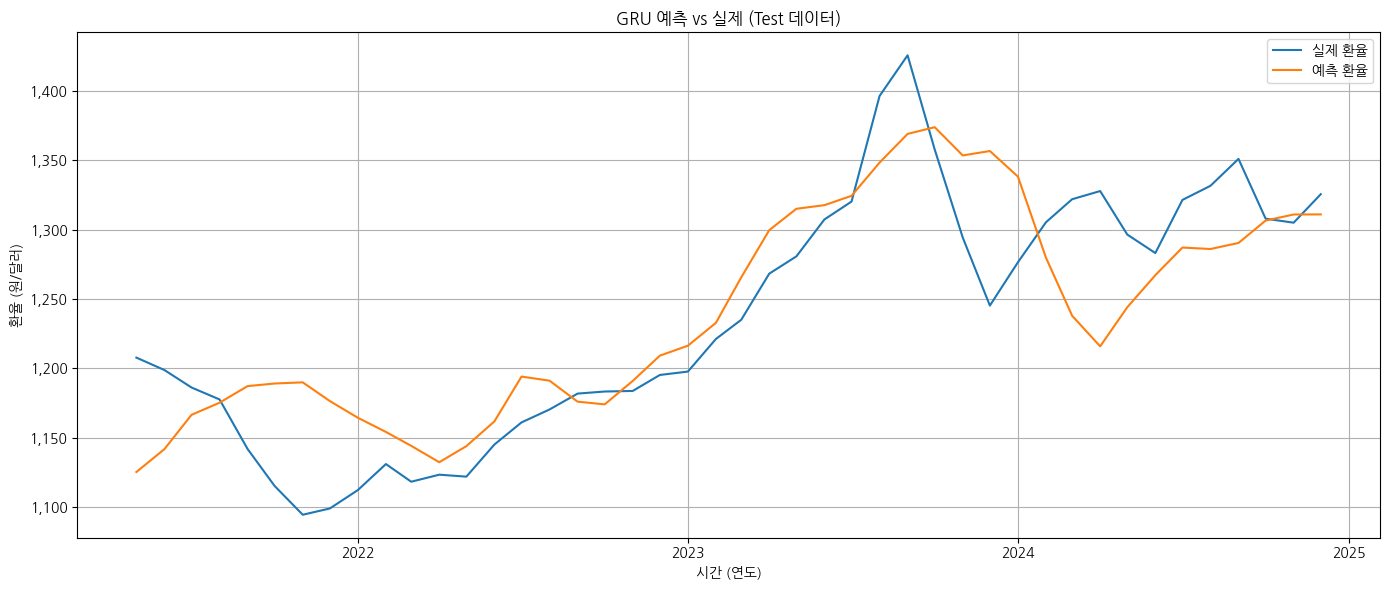

In [96]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd

# TIME 컬럼 datetime 형식으로 변환
time = pd.to_datetime(merged["TIME"].dropna().reset_index(drop=True))

# 테스트셋 시작 시점 인덱스
test_start_index = len(time) - len(y_test_inv)
time_test = time[test_start_index:].reset_index(drop=True)

# 시각화
plt.figure(figsize=(14, 6))
plt.plot(time_test, y_test_inv, label='실제 환율')
plt.plot(time_test, y_pred_inv, label='예측 환율')

# y축: 세 자리마다 콤마
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# x축: 연도만 보이게 설정
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('GRU 예측 vs 실제 (Test 데이터)')
plt.xlabel('시간 (연도)')
plt.ylabel('환율 (원/달러)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


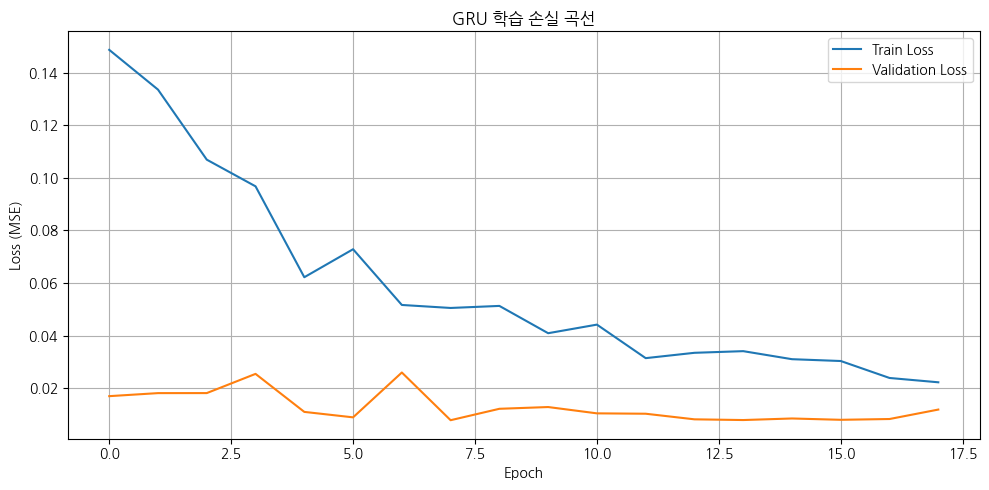

In [97]:
import matplotlib.pyplot as plt

# 학습곡선 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GRU 학습 손실 곡선')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()